# Inaugural Project

Imports and set magics:

In [33]:
import numpy as np

#test
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from scipy import optimize 
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from types import SimpleNamespace
# Import your own code
from  inauguralproject import ExchangeEconomyClass


model = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**--**
We set up the possible allocoations of X1A and x2a, these can be from 0 to 1.

**--**
We then set up two empty lists for posible x1 and x2 paretooptimal allocations.

**--**
Lastly we loop trhough all possible allocations of X1A and x2A, if the allocation creates at least the same utility for both A and B we then add that allocation to our 
paretooptimal allocations


In [84]:
N = 75
w1A = 0.8
w2A = 0.3


x1A = np.linspace(0,1,N+1)
x2A = np.linspace(0,1,N+1)

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)


-- We plot this in the given box

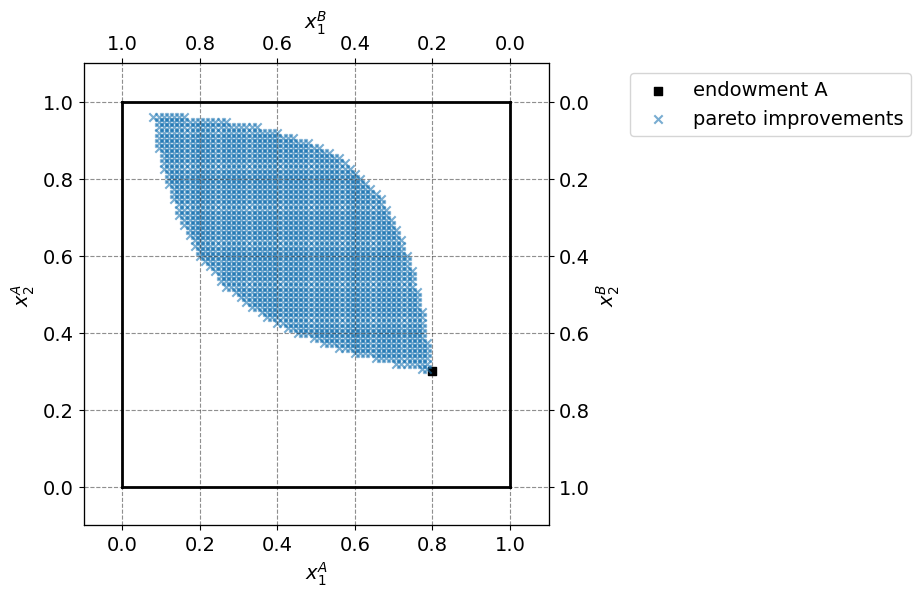

In [83]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment A')
ax_A.scatter(x1possible,x2possible, marker='x',alpha=0.6, label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));



From this we can see all the pareto optimal allocations, given the initial endownments.

# Question 2

Here we create the list of prices P1 with a loop and check the last two numbers of the list

In [98]:

p1 = []

for x in range(N+1):
    new = 0.5+2*x/N
    p1.append(new)

print(p1[74:76])


[2.4733333333333336, 2.5]


To find the error in the market clearing conditon we run all the prices through the check market clearing function from our py.file and append each error to the list error.
After that we plot the error.

[(0.533333333333333, -0.2666666666666666)]


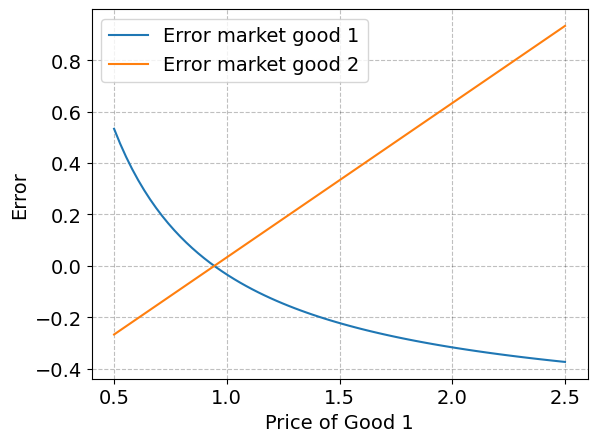

In [99]:

error = []

for x in p1:
    append_e = model.check_market_clearing(x)
    error.append(append_e)

print(error[0:1])



errors_1 = [e[0] for e in error]
errors_2 = [e[1] for e in error]



plt.plot(p1, errors_1, label='Error market good 1')
plt.plot(p1, errors_2, label='Error market good 2')
plt.xlabel('Price of Good 1')
plt.ylabel('Error')
plt.legend()
plt.show()



We see here that with a price of approxmitly 0,95 both markets clear, witch will be calculated in the following exercise.

# Question 3

To find the market clearing price we run the prices through a loop and find the error. The loop contiues aslong as the error is above 
a small value, and each time the price is is opdated, finding a new error.

When the market error satisfactually close to one we have found the market clearing price.

In [38]:
P1_guess = 2

model.market_clearing_price(P1_guess)

print('Consumer B gets', model.demand_B(0.94445)[0], 'of x1 and ',model.demand_B(0.94445)[1],' of x2')
print('Consumer A gets', (model.demand_A(0.94445)[0]), 'of x1 and ',(model.demand_A(0.94445)[1]),' of x2')


  0: p1 =   1.52500000 -> excess demand ->    -0.31666667
  1: p1 =   1.18237705 -> excess demand ->    -0.22841530
  2: p1 =   1.00126786 -> excess demand ->    -0.12073946
  3: p1 =   0.95019154 -> excess demand ->    -0.03405088
  4: p1 =   0.94474802 -> excess demand ->    -0.00362902
   ...
  9: p1 =   0.94444445 -> excess demand ->    -0.00000000
Consumer B gets 0.6274480738348598 of x1 and  0.2962966666666667  of x2
Consumer A gets 0.3725483967741366 of x1 and  0.7037066666666668  of x2


We find a market clearing price of P1 to 0.95 which is consistent with our prediction from the visual inspection from above.

# Question 4

**4.a**

To find the allocation if A gets to max her own utiliy and only prices from P1 can be used we run through the prices in P1, finding the price which gives the highest utility for consumer A, such that this has ben found using a brute force optimizer, looping in all posible prices.

We opdate the price every time we get a larger utility than we had before.

In [62]:

utility_4a = -np.inf
optimal_price = None 

for x in p1:
    if 1-model.demand_B(x)[0] > 0 and 1-model.demand_B(x)[1]> 0:
        u = model.utility_A(1-model.demand_B(x)[0],1-model.demand_B(x)[1])

        if u > utility_4a:
            utility_4a = u
            optaimal_price = x

print('As utility becomes', utility_4a)   
print('the optimal price is',optaimal_price)

print('Consumer B gets', model.demand_B(1.8866)[0], 'of x1 and ',model.demand_B(1.8866)[1],' of x2')
print('Consumer A gets', (1-model.demand_B(1.8866)[0]), 'of x1 and ',(1-model.demand_B(1.8866)[1]),' of x2')


As utility becomes 0.633615985237553
the optimal price is 1.8866666666666667
Consumer B gets 0.38069189724018504 of x1 and  0.35910666666666663  of x2
Consumer A gets 0.619308102759815 of x1 and  0.6408933333333333  of x2


We note here that the price is different from 3. which makes sence since the problem only is maximizing consumer A's utility, and A having more of good one relative to good two, wanting a relative higher price on good one. 

**4.b**

In this case we will be using an optimizer, such that  we dont have to loop through all prices, this is descriped in the py file, in order to find the allocation, given consumer b can not be placed in a worse state than under the initial indownment, i.e a pareto optimisation.

In [70]:

utility_4b = -np.inf

# Create an instance of the model
model = ExchangeEconomyClass()

# Find the optimal price and the corresponding utility
optimal_price_b, utility_4b = model.optimal_price()

print('As utility becomes', utility_4b)   
print('the optimal price is', optimal_price_b)

print('Consumer B gets', model.demand_B(optimal_price_b)[0], 'of x1 and', model.demand_B(optimal_price_b)[1], 'of x2')
print('With a utility of', model.utility_B(model.demand_B(optimal_price_b)[0],model.demand_B(optimal_price_b)[1]))

print('Consumer A gets', (1 - model.demand_B(optimal_price_b)[0]), 'of x1 and', (1 - model.demand_B(optimal_price_b)[1]), 'of x2')








As utility becomes 0.6336208506936273
the optimal price is 1.8993473410798707
Consumer B gets 0.37903176698651864 of x1 and 0.3599564894053247 of x2
With a utility of 0.3725635895475608
Consumer A gets 0.6209682330134814 of x1 and 0.6400435105946753 of x2


We see that optimizing though all posible prices rather than a specific price set, place A in a slightly better situation given 0.63362 > 0.63361. Allthough the number of prices in this case 75, result in fairly close results between the two.

# Question 5

**5.a**

In this question we are asked to find the allocaiton consumer A would choose if he can choose between the choice set found in Q1 and ensure consumer B has asleast the same ammount of utility as he has with his endowment. 

We find the allocaiton by first zipping the possible x1 and x2 togehter form Q1. Note that we here only look at the top curve of the possible endowments. We then run the possible allocations thorugh a loop and with the same method as in 4.a we find the allocation which max A's utility.

In [101]:
u_5a = None

utility_5b = -np.inf

C = list(zip(x1possible,x2possible))  #All sets placed incide c.

for x1_5a, x2_5a in C: # looping in all the sets of C.
        
        u_5a = model.utility_A(x1_5a,x2_5a)  # Finding the utility inside a given set.
        if u_5a >= utility_5b:  #opdating if found allocation is giving a larger utility.
            utility_5b = u_5a  
            x1_5a_optimal = x1_5a
            x2_5a_optimal = x2_5a

print('A chooses X1 =', x1_5a_optimal, 'And X2 =', x2_5a_optimal  )
print('Utility for A:', utility_5b)


model = ExchangeEconomyClass()
print('Utility for b:', model.utility_B(1-x1_5a,1-x2_5a))
print('Utility for b:', model.utility_B(0.2,0.7))




A chooses X1 = 0.56 And X2 = 0.8533333333333334
Utility for A: 0.7415523509091093
Utility for b: 0.30552823018573
Utility for b: 0.3036588971875663


This allocaiton makes good sense, since A gets more utility from good 2  than good 1 (to a point)

**5.b**

In this case we will be using an optimizer, given we otherwise should have looped through an emence amount of allocation, wich would take a long time. From this A finds the perfect allocation, given not setting b in a worse state than before. We will be using an differential_evolution optimizer, to ensure the optimizer to find a global maxima given its using multi start. 

If we had ben using the minimizer from before, we should have set the starting value to that found in 5.a, such that the probability of converging to the global maxima to be larger.

In [107]:
# Create an instance of the model
model = ExchangeEconomyClass()

# Find the optimal choice for consumer A and corresponding utilities
try:
    x1A_opt, x2A_opt, utility_A_max, utility_B_final = model.optimal_choice_for_A()

    print('A chooses X1 =', x1A_opt, 'And X2 =', x2A_opt)
    print('Utility for A:', utility_A_max)
    print('Utility for B:', utility_B_final)

except Exception as e:
    print(f"An error occurred: {e}")



A chooses X1 = 0.5757631835833215 And X2 = 0.8444244031920959
Utility for A: 0.7432275745278694
Utility for B: 0.303658933185872


We see that the allocation is alomost the same as in Q5.a given we now can look in all posible allocation, and are not bound to different allocations steps. When optimising we therby end up in a slightly better position than when looping through the possible allocations in C.

# Question 6

**6.a**

Here we are asked to find maximize the combined utility and once agian we use the same approach with looping through and finding the allocation with the highest combined utility.

In [116]:
x1_6a = np.linspace(0, 1, 1000)
x2_6a = np.linspace(0, 1, 1000)
utility_6a = -np.inf


for x1_6a_1 in x1_6a:
    for x2_6a_1 in x2_6a:
        u_6a = model.utility_A(x1_6a_1,x2_6a_1) + model.utility_B((1-x1_6a_1),(1-x2_6a_1)) 
        if u_6a >= utility_6a:
            utility_6a = u_6a
            x1_6a_optimal = x1_6a_1
            x2_6a_optimal = x2_6a_1

print('Planer give consumer A X1 =', x1_6a_optimal, 'And X2 =', x2_6a_optimal, '\n', 'Planer give consumer B X1 =', (1-x1_6a_optimal), 'And X2 =', (1-x2_6a_optimal),)

Planer give consumer A X1 = 0.3333333333333333 And X2 = 0.6666666666666666 
 Planer give consumer B X1 = 0.6666666666666667 And X2 = 0.33333333333333337


We see here that the allocaiton is 1/3 of X1 to A and 2/3 of X2 to A which given the utility function and alpha=1/3 obously also must be the allocation that maximize the utility. We could also have used an maximiser resulting in:

In [115]:
if __name__ == "__main__":
    model = ExchangeEconomyClass()
    x1A_optimal, x2A_optimal, utility_A_max, utility_B_max = model.maximize_combined_utility()

    print('Planner gives consumer A X1 =', x1A_optimal, 'And X2 =', x2A_optimal)
    print('Planner gives consumer B X1 =', 1 - x1A_optimal, 'And X2 =', 1 - x2A_optimal)
    print('Utility for A:', utility_A_max)
    print('Utility for B:', utility_B_max)

Planner gives consumer A X1 = 0.3333762861018794 And X2 = 0.6667071577352583
Planner gives consumer B X1 = 0.6666237138981206 And X2 = 0.33329284226474165
Utility for A: 0.5291778366615465
Utility for B: 0.5290895308531179


We note the optimizer to be a lot faster than the brute force model.

**6.b**

We Plot the same edgewoth box that we found in q1, we now included our results from the other questions

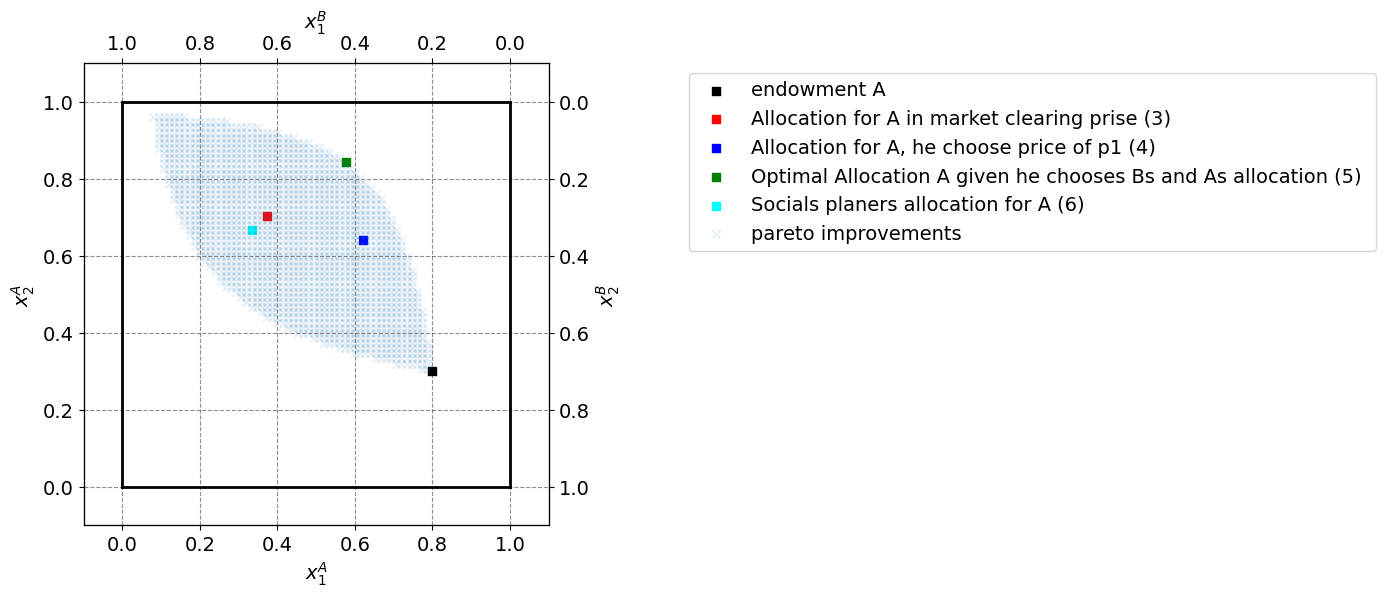

In [120]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment A')
ax_A.scatter(model.demand_A(0.94445)[0],model.demand_A(0.94445)[1], marker='s',color='red', label='Allocation for A in market clearing prise (3)')
ax_A.scatter((1-model.demand_B(1.899)[0]),(1-model.demand_B(1.899)[1]),marker='s',color='blue',label='Allocation for A, he choose price of p1 (4)')
ax_A.scatter(x1A_opt,x2A_opt,marker='s',color='green',label='Optimal Allocation A given he chooses Bs and As allocation (5) ')
ax_A.scatter(x1_6a_optimal,x2_6a_optimal,marker='s',color='cyan',label='Socials planers allocation for A (6)')
ax_A.scatter(x1possible,x2possible, marker='x',alpha=0.1, label='pareto improvements')



# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(2.8,1.0));

We see that, the social planer and the market clearing price are fairly close to each other. When A can choos the alocation directly as in (5) we find that he will place the endownment along the upperside of the pareto alocations, given this will maximise his own utility. 

We also note than when A can choose the price he gets somewhat closer to the upper boundaries of the alocation, it's just nut as efficient for A, as when i chooses the allocation directly.

# Question 7

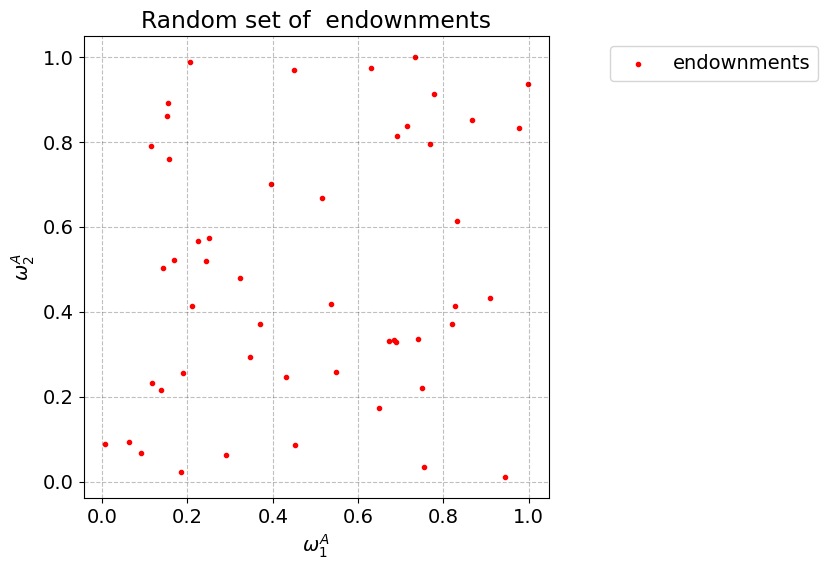

In [122]:


np.random.seed(1312)

w1A = np.random.uniform(low=0,high=1,size=50)
w2A = np.random.uniform(low=0,high=1,size=50)

fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_Q7 = fig.add_subplot(1, 1, 1)

ax_Q7.set_xlabel("$\omega_1^A$")
ax_Q7.set_ylabel("$\omega_2^A$")
ax_Q7.set_title("Random set of  endownments")

ax_Q7.scatter(w1A, w2A, label = "endownments", color="red", marker=".")
ax_Q7.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

We pick a random seed and draw 50 values of each endownments, knowing they will be placed between 0 and 1.

# Question 8

We zip the found endownments into endownment pairs, such that we can find the market clearing price, and there by the allocation for each initial endownment. To to this we create a new function in the py. file, this is the same a the previus market clearing price, just without printing. We then append this to a list of the market clearing allocations. At the end we return the model the given endownments.

In [17]:
# Zipping the two list so we get pairs.
W = list(zip(w1A,w2A))

# now we need the market clearing prise for alle the endownment's, and calculate the best allocation

x1_E = []
x2_E = []

P1_guess = 2

for par.w1A,par.w2A in W:
    x1_E.append(model.demand_A(model.market_clearing_price_Q8(P1_guess))[0])
    x2_E.append(model.demand_A(model.market_clearing_price_Q8(P1_guess))[1])

# this market clearing funktion is the same as before just without the prints

# Reset model parameters to orignial:
model.par.w1A = 0.8
model.par.w2A = 0.3

# we can now plot all the allocatins for A given the market clearing prises:


We can now plot the found market clearing alloctions

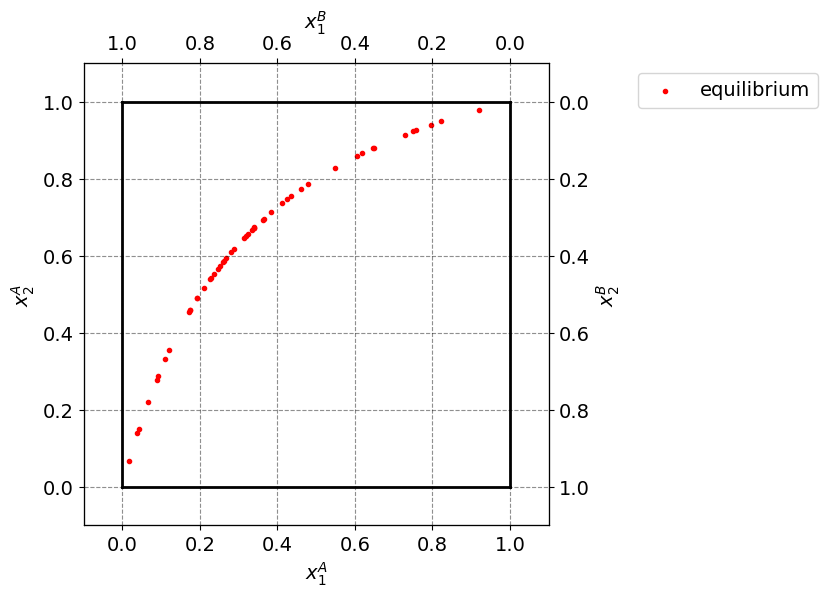

In [16]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(x1_E, x2_E, label = "equilibrium", color="red", marker=".")


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

We see that the market clearing allocations all are placed alongside the curve, showing A getting relatively more of good 2, and B getting relatively more of good 1, compared to each other. This comes from the fact, of the utlity function as where A want's to give relatively more of good 1, to recive some of good 2.

This is also known as the contract curve, showing the where alle market equalibrias are placed